# Chapter 11 - The VARMAX Model

## Listing 11-1. Prepare the Walmart data for the VARMAX model

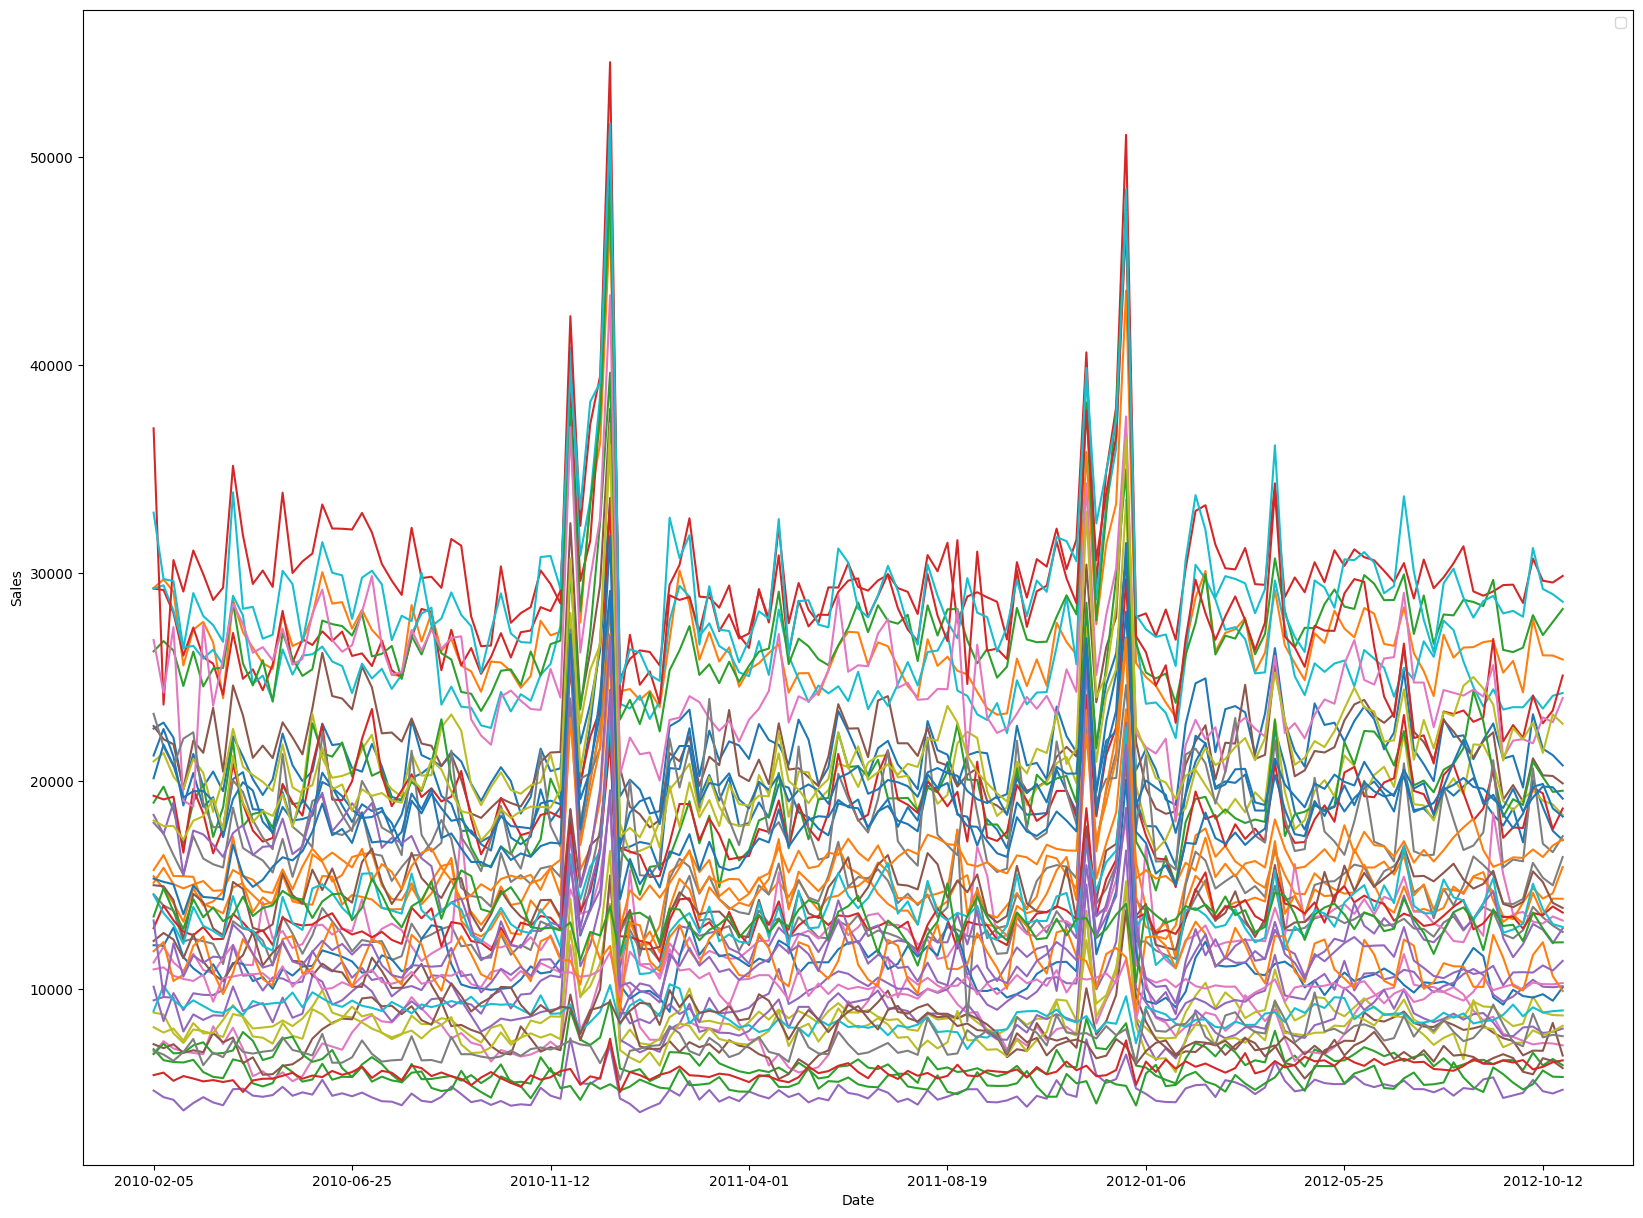

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('train.csv')
exog = data.groupby('Date')['IsHoliday'].sum() > 0
exog = exog.apply(lambda x: float(x))

data = data.pivot_table(index = 'Date', columns = 'Store', values = 'Weekly_Sales')

ax = data.plot(figsize=(20,15))
ax.legend([])
ax.set_ylabel('Sales')
plt.show()


## Listing 11-2. Running the VARMAX(1,1) model

In [2]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_percentage_error
import mlflow

mlflow.autolog()

train = data.iloc[:-10,[0,1,2]]
test = data.iloc[-10:,[0,1,2]]

train_exog = exog[:-10]
test_exog = exog[-10:]

mod = sm.tsa.VARMAX(train, order=(1,1), exog=train_exog)
res = mod.fit(maxiter=100, disp=False)

fcst = res.forecast(exog=test_exog.values, steps=10)
mape = mean_absolute_percentage_error(test, fcst)
model_accuracy = 1 - mape
print(model_accuracy)


2025/05/26 12:53:06 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/05/26 12:53:07 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
/opt/anaconda3/envs/chapter10-11/lib/python3.9/site-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/opt/anaconda3/envs/chapter10-11/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
2025/05/26 12:53:07 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '9fa85ca1392b4c0e917ffcf73c5012a4', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current statsmodels workflow
/opt/anaconda3/envs/chap

0.9625380977271024


/opt/anaconda3/envs/chapter10-11/lib/python3.9/site-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/opt/anaconda3/envs/chapter10-11/lib/python3.9/site-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
